In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import dependencies

In [2]:
## create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# create a floating point list of random latitudes
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# create a floating point list of random longitudes
lat_lngs = zip(lats, lngs)
# returns an object with both tuples paired together
lat_lngs

In [3]:
coordinates = list(lat_lngs)
# turn the 'lat_lngs' object into a list so that we can use it

In [4]:
## now we can use the citipy module to find the nearest cities to the random coordinates in our list

from citipy import citipy
# import citipy module

cities = []
# create a list for holding the cities

# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
    
# print the city count to confirm sufficient count
len(cities)

607

In [5]:
import requests
# import the requests library

from config import weather_api_key
# import the api key from the config file we created

In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=" + weather_api_key
# starting url for weather map api call
print(url)

https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=16d24d2eb2143f2ff1efd161db7f61cb


In [7]:
# create an endpoint URL for a city

city_url = url + "&q=" + "Boston"
# creates endpoint reference for a city
city_weather = requests.get(city_url)
# uses the get() function to return city weather data in json format
city_weather.json()
# prints the data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 291.36,
  'feels_like': 291.25,
  'temp_min': 287.01,
  'temp_max': 294.78,
  'pressure': 1008,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 100},
 'clouds': {'all': 40},
 'dt': 1654291111,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1654247359,
  'sunset': 1654301749},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
boston_data = city_weather.json()
# assigns a variable to json weather data for Boston

In [9]:
boston_data["sys"], boston_data["sys"]["country"], boston_data["dt"]

({'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1654247359,
  'sunset': 1654301749},
 'US',
 1654291111)

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 294.78 77 40 4.12


In [11]:
## this bit will allow us to convert the UTC to ISO format

from datetime import datetime
# import the datetime module
date = boston_data["dt"]
# get the date from the json data
datetime.utcfromtimestamp(date)
# convert utc to date format with year, month, day, hours, minutes, and seconds

datetime.datetime(2022, 6, 3, 21, 18, 31)

In [12]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')
# same function, but with formatting parameters to make it look nice

'2022-06-03 21:18:31'

In [13]:
## this bit will create a list of city urls

import time
# imports time dependency

city_data = []
# create an empty list to hold the weather data
print("Beginning Data Retrieval     ")
print("-----------------------------")
# print the beginning of the logging

record_count = 1
set_count = 1
# create and set counters to 1

for i, city in enumerate(cities):
# loops through all the cities in the list and uses enumerate() to retrieve index and city name

    if (i % 50 == 0 and i >= 50):
    # group cities in sets of 50 for logging purposes
        set_count += 1
        record_count = 1
        time.sleep(10)

    city_url = url + "&q=" + city.replace(" ","+")
    # create endpoint URl for each city

    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # log the url, record, set numbers, and the city
    record_count += 1
    # add 1 to record count
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | the valley
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | verkhnyaya balkariya
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | nelson
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | baruun-urt
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | sur
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | ziarat
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | coruripe
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | jumla
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | constitucion
Processing

Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | iracoubo
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | arlit
Processing Record 44 of Set 4 | usoke
Processing Record 45 of Set 4 | brainerd
Processing Record 46 of Set 4 | peniche
Processing Record 47 of Set 4 | victoria
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | goderich
Processing Record 50 of Set 4 | grindavik
Processing Record 1 of Set 5 | krasnoselkup
Processing Record 2 of Set 5 | pemangkat
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | monte azul paulista
Processing Record 5 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 6 of Set 5 | bam
Processing Record 7 of Set 5 | mudgee
Processing Record 8 of Set 5 | mount gambier
Processing Record 9 of Set 5 | taoudenni
Processing Record 10 of Set 5 | lolua
City not found. Skipping...
Processing Record 11 of Set 5 | 

Processing Record 28 of Set 8 | batemans bay
Processing Record 29 of Set 8 | liverpool
Processing Record 30 of Set 8 | tondon
Processing Record 31 of Set 8 | tuatapere
Processing Record 32 of Set 8 | tilichiki
Processing Record 33 of Set 8 | mandalgovi
Processing Record 34 of Set 8 | andros town
Processing Record 35 of Set 8 | merauke
Processing Record 36 of Set 8 | maniitsoq
Processing Record 37 of Set 8 | atbasar
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | kokopo
Processing Record 40 of Set 8 | hofn
Processing Record 41 of Set 8 | namie
Processing Record 42 of Set 8 | delta del tigre
Processing Record 43 of Set 8 | bay roberts
Processing Record 44 of Set 8 | mitsamiouli
Processing Record 45 of Set 8 | belyy yar
Processing Record 46 of Set 8 | turukhansk
Processing Record 47 of Set 8 | ketchenery
City not found. Skipping...
Processing Record 48 of Set 8 | savannah bight
Processing Record 49 of Set 8 | westpunt
City not found. Skipping...
Processing Record 5

Processing Record 14 of Set 12 | colon
Processing Record 15 of Set 12 | coquimbo
Processing Record 16 of Set 12 | charters towers
Processing Record 17 of Set 12 | awjilah
Processing Record 18 of Set 12 | makakilo city
Processing Record 19 of Set 12 | mahibadhoo
Processing Record 20 of Set 12 | port macquarie
Processing Record 21 of Set 12 | dukat
Processing Record 22 of Set 12 | zheleznodorozhnyy
Processing Record 23 of Set 12 | alnashi
Processing Record 24 of Set 12 | fatezh
Processing Record 25 of Set 12 | ban nahin
Processing Record 26 of Set 12 | chipinge
Processing Record 27 of Set 12 | rakovski
Processing Record 28 of Set 12 | timmins
Processing Record 29 of Set 12 | soyo
Processing Record 30 of Set 12 | suhut
Processing Record 31 of Set 12 | kingman
Processing Record 32 of Set 12 | kamaishi
Processing Record 33 of Set 12 | dipkarpaz
City not found. Skipping...
Processing Record 34 of Set 12 | san cristobal
Processing Record 35 of Set 12 | roseland
Processing Record 36 of Set 12 

In [14]:
print(len(city_data))

555


In [15]:
city_data_df = pd.DataFrame(city_data)
# convert the 'city_data' array to a dataframe 
city_data_df.head(10)
# print the first ten rows of the dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,The Valley,18.2170,-63.0578,302.49,74,40,5.66,AI,2022-06-03 21:21:09
1,Albany,42.6001,-73.9662,298.18,43,2,5.14,US,2022-06-03 21:21:06
2,Bredasdorp,-34.5322,20.0403,283.77,87,86,1.95,ZA,2022-06-03 21:21:10
3,Verkhnyaya Balkariya,43.1279,43.4573,285.66,65,99,4.66,RU,2022-06-03 21:21:11
4,Rikitea,-23.1203,-134.9692,297.89,70,87,6.05,PF,2022-06-03 21:21:11
5,Nelson,-41.2833,173.2833,278.31,98,0,1.79,NZ,2022-06-03 21:21:12
6,Cape Town,-33.9258,18.4232,286.55,92,50,1.03,ZA,2022-06-03 21:17:01
7,Baruun-Urt,46.6806,113.2792,286.41,73,100,3.62,MN,2022-06-03 21:21:13
8,Busselton,-33.6500,115.3333,286.64,64,88,3.72,AU,2022-06-03 21:21:14
9,Sur,22.5667,59.5289,303.19,58,15,4.73,OM,2022-06-03 21:21:15


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", 
                    "Cloudiness", "Wind Speed"]
# create variable with new column order
city_data_df = city_data_df[new_column_order]
# apply to dataframe
city_data_df.head()
# check work

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,The Valley,AI,2022-06-03 21:21:09,18.2170,-63.0578,302.49,74,40,5.66
1,Albany,US,2022-06-03 21:21:06,42.6001,-73.9662,298.18,43,2,5.14
2,Bredasdorp,ZA,2022-06-03 21:21:10,-34.5322,20.0403,283.77,87,86,1.95
3,Verkhnyaya Balkariya,RU,2022-06-03 21:21:11,43.1279,43.4573,285.66,65,99,4.66
4,Rikitea,PF,2022-06-03 21:21:11,-23.1203,-134.9692,297.89,70,87,6.05


In [17]:
output_data_file = "weather_data/cities.csv"
# create the output file (CSV)
city_data_df.to_csv(output_data_file, index_label="City_ID")
# export the city data dataframe into a csv file

In [18]:
## now going to create a scatterplot with some of the data we've organized

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# extract relevant fields from dataframe for plotting

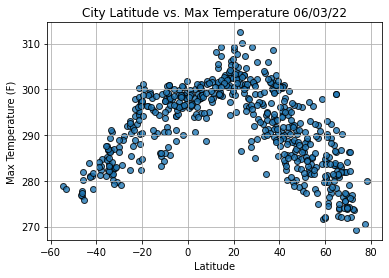

In [19]:
import time
# import time module

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
            # create the scatter plot for latitude vs max temperature

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# incorporate other graph properties

plt.savefig("weather_data/Fig1.png")
# save the figure

plt.show()
# show the plot

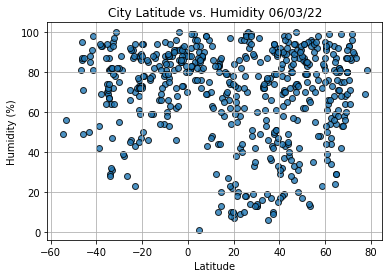

In [20]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
            # build scatter plot for latitude vs humidity

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# incorporate other graph properties

plt.savefig("weather_data/Fig2.png")
# save the figure
plt.show()